In [1]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols, zeros, simplify
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
%matplotlib notebook


# Mathematics for Machine Learning

## Session 8: The determinant; eigenvectors and eigenvalues

## Gerhard Jäger

### November 14, 2024

# Determinants

Consider the matrix 
$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

What is the area of the parallelogram defined by the two column vectors?

<IPython.core.display.Javascript object>


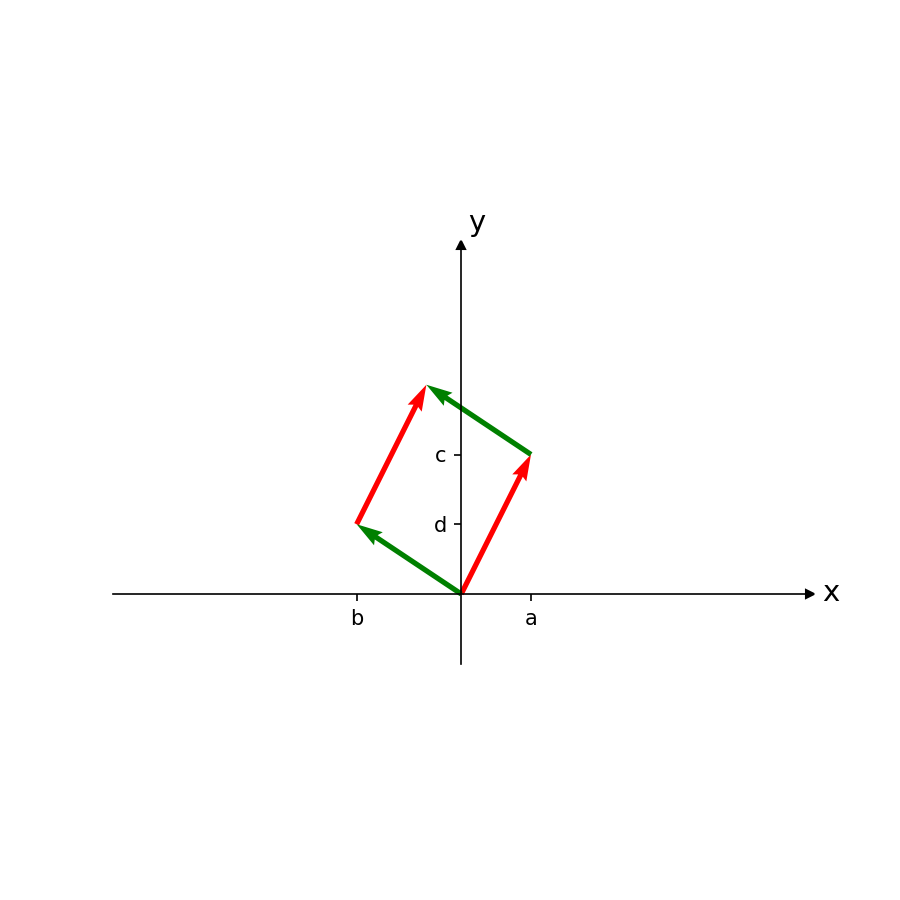

In [2]:
a, b, c, d = 2, -3, 4, 2

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -9, 9, -1, 9
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([b,a])
ax.set_xticklabels(['b','a'])
ax.set_yticks([d,c])
ax.set_yticklabels(['d','c'])

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)


ax.quiver((0,),(0,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((b,),(d,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((0,),(0,), (b,), (d,), units="xy", scale=1, color='green')
ax.quiver((a,),(c,), (b,), (d,), units="xy", scale=1, color='green')

### horizontal elimination

$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix} \Rightarrow
\begin{bmatrix}
\frac{ad-bc}{d} & b \\
0 & d
\end{bmatrix} \Rightarrow
\begin{bmatrix}
\frac{ad-bc}{d} & 0 \\
0 & d
\end{bmatrix}
$$

<IPython.core.display.Javascript object>


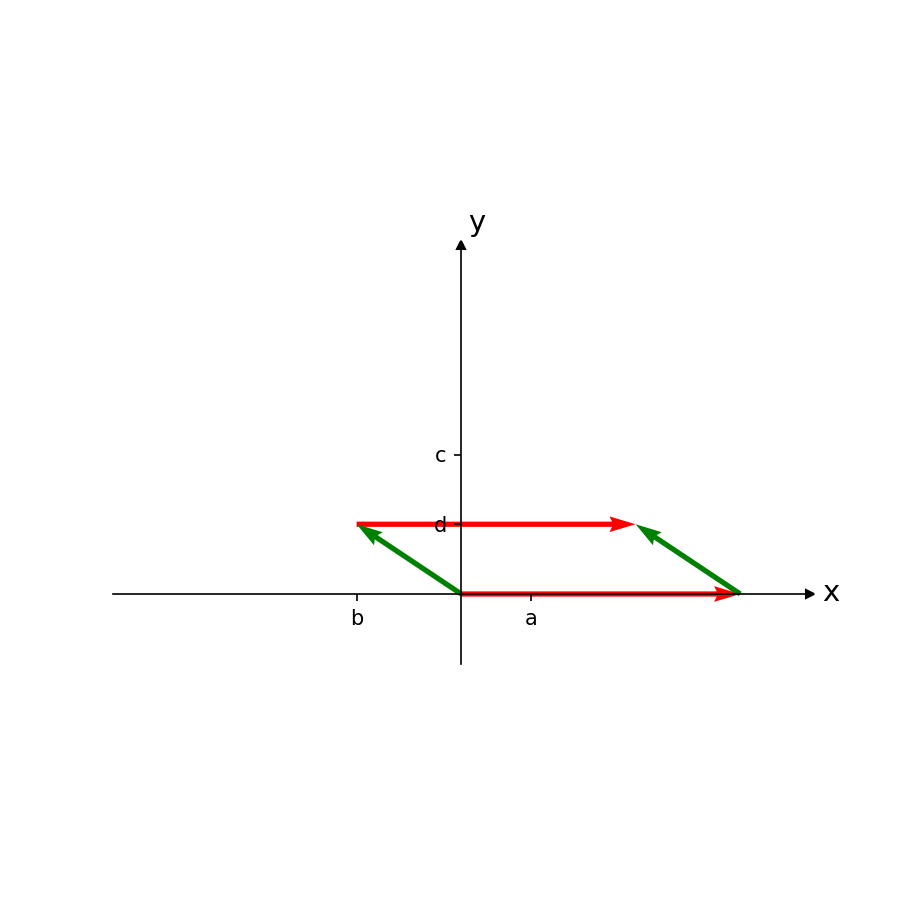

In [3]:
a, b, c, d = 8, -3, 0, 2

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -9, 9, -1, 9
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([-3, 2])
ax.set_xticklabels(['b','a'])
ax.set_yticks([2, 4])
ax.set_yticklabels(['d','c'])

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)


ax.quiver((0,),(0,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((b,),(d,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((0,),(0,), (b,), (d,), units="xy", scale=1, color='green')
ax.quiver((a,),(c,), (b,), (d,), units="xy", scale=1, color='green')

<IPython.core.display.Javascript object>


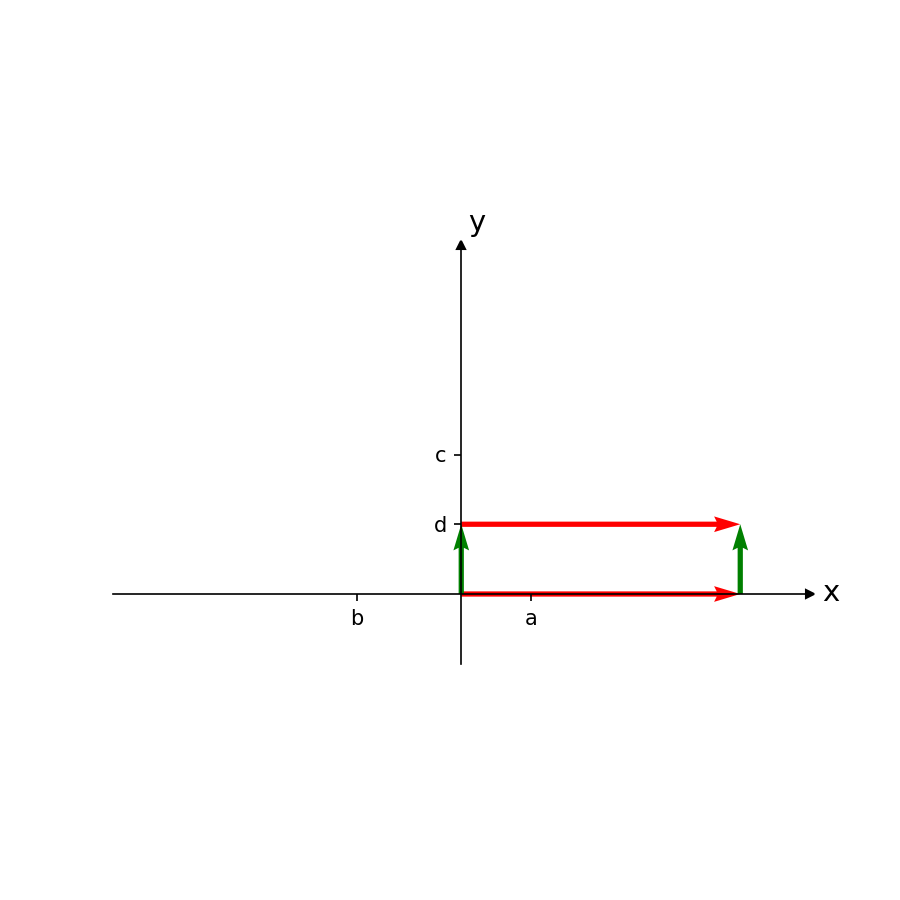

In [4]:
a, b, c, d = 8, 0, 0, 2

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -9, 9, -1, 9
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([-3,2])
ax.set_xticklabels(['b','a'])
ax.set_yticks([2,4])
ax.set_yticklabels(['d','c'])

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)


ax.quiver((0,),(0,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((b,),(d,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((0,),(0,), (b,), (d,), units="xy", scale=1, color='green')
ax.quiver((a,),(c,), (b,), (d,), units="xy", scale=1, color='green')

The area of this rectangle is

$$
ad-bc
$$

Since the geometric transformations  corresponding to elimination did not change the area, the original parallelogram also has the area $ad-bc$.

### Determinants

The determinant of a matrix $A$ is written as
$$
\displaystyle\mathrm{det}(A)
$$

or 

$$
\displaystyle|A|
$$

The determinant is a function that maps each *square matrix* to a *real number*.

### three ways to compute the determinant

- axiomatic approach
- via permutations ("Leibniz' formula")
- recursively via cofactors ("Laplace expansion")

The absolute value of the determinant equals the area/volume of the parallelepiped defined by the column vectors.

## Axiomatix approach

#### 1. For each $n$, $$|\mathbf I_n| = 1$$ where $\mathbf I_n$ is the $n\times n$ identity matrix.

#### 2. If $B$ is the result of swapping two columns in $A$, then
$$
|B| = - |A|
$$

#### 3. $|A|$ is a linear function of each of its columns:

$$
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &x\mathbf a_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix} = 
x\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf a_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix}\\[3em]
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf a_i + \mathbf b_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix} = 
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf a_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix} +
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf b_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix}
$$


As we will see later, there is exactly one function with these properties.

### Consequences

From these three axioms, we can derive seven useful lemmas.

#### 4. If two columns of $A$ are identical, $|A| = 0$.

*Proof:* Swapping the two identical columns does not change $A$, but according to Axiom 2, we get $|A| = -|A|$. The only value consistent with this is $|A| = 0$.

$\dashv$

#### 5. Adding a multiple of one column of $A$ to another column does not change $|A|$.

*Proof:* According to rules 3 and 4:

$$
\begin{aligned}
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i + x\mathbf a_j&\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} &= 
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} +
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& x\mathbf a_j &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix}\\[2em]
&=
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} +
x\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_j &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix}\\[2em]
&= 
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} \\[2em]
&=|A|
\end{aligned}
$$

$\dashv$

#### 6. If $A$ has an all-zero column, then $|A| = 0$.

*Proof:*

If $A$ has more than one all-zero columns, this follows from rule 4. If it has only one all-zero column, then adding one of the other columns to the all-zero column does not change the determinant according to rule 5. This will lead to a matrix with two identical columns though, which has a determinant $=0$ according to rule 4. 

$\dashv$

#### 7. The determinant of a triangular matrix equals the product of its diagonal entries.

*Proof:*

Let us first assume that all diagonal entries are $\neq 0$. 

According to rule 5, we can perform mirrored Gauss elimination (working with columns rather than with rows) with $A$ if it is upper triangular, and otherwise mirrored Jordan elimination. According to rule 5 this does not change the determinant, and according to the rules of Gauss-Jordan elimination, this does not change the diagonal entries. We end up with a diagonal matrix

$$
D = \begin{bmatrix}
d_{11} & & \\
& \ddots & \\
& & d_{ii}\\
&&&\ddots\\
&&&&d_{nn}
\end{bmatrix}
$$

Using Axiom 2, it follows that

$$
|D| = d_{11}\times \cdots \times d_{nn}\times |\mathbf I_n| = d_{11}\times \cdots \times d_{nn}
$$



Now suppose $d_{ii}=0$. Then the product of the diagonal entries $=0$. 

After completing mirrorred Gauss-Jordan elimination, the last column is all-zero. Elimination steps do not change the determinant, so the determinant must be $0$ according to rule 6.


$\dashv$

**Uniqueness of the determinant function**

With these rules, we can compute the determinant of each square matrix by performing Gauss elimination (possibly preceded by column permutations) and computing the product of the resulting triangular matrix. This algorithm only relies on the three axioms, so any function fulfilling the axioms must yield the same result for each matrix.

#### 8. Product rule: for all square matrices $A, B$ of the same size:

$$
|AB| = |A| \times |B|
$$

*Proof:*

Suppose $|A| = 0$. Gauss elimination does not change the determinant. If we need to perform column permutation prior to (mirrorred) Gauss elimination, this only changes the sign of the determinant, not its absolute value.
Since $|A|=0$, the result of Gauss elimination must, according to Lemma 7, contain at least one $0$. Hence $A$ must have rank $r<n$ (where $n$ is the number of columns of $A$). In other words, there is a vector $\mathbf x\neq \mathbf 0$ such that $\mathbf x'A = \mathbf 0$. It follows that $\mathbf x'AB = \mathbf 0$, so $AB$ also has rank $< n$. This entails that the result of Gauss elimination applied to $AB$ has a $0$ on the main diagonal, so $|AB| = 0$.

Now suppose $|A| \neq 0$. Let us define a function 

$$
D(B) \doteq 
\left\{
\begin{array}{ll}
\frac{|AB|}{|A|}&\mathrm{~if~}|A|\neq 0\\
|B| &\mathrm{~ else}
\end{array}
\right.
$$

The function $D$ fulfills axioms 1–3:

- If $B = \mathbf I$, then $D(B) = \frac{|A|}{|A|} = 1$
- If $C$ is the result of multiplying column $i$ in $B$ by $x$, then there is a matrix $M$, which is exactly like the identity matrix except $m_{ii} = x$, with:

$$
\begin{aligned}
C &= BM\\
AC &= ABM
\end{aligned}
$$

So $AC$ is the result of multiplying column $i$ in $(AB)$ by $x$. Hence

$$
\begin{aligned}
|AC|&= |ABM|\\
&= x|AB|\\
D(C) &= \frac{|AC|}{|A|}\\
&=\frac{x|AB|}{|A|}\\
&=xD(B)
\end{aligned}
$$




- If $C$ is the result of swapping columns $i$ and $j$ in $B$, then

$$
C = B P,
$$

Where $P$ is like the identiy matrix, except that $p_{ij}, p_{ji} = 1, p_{ii}, p_{jj} = 0$.

Then 
$$
AC =  ABP,
$$

hence $AC$ is the result of swapping columns $i$ and $j$ in $AB$. Therefore

$$
\begin{aligned}
|AC| &= |ABP|\\
&= - |AB|\\
D(C) &= - D(B)
\end{aligned}
$$

Therefore $D(C) = - D(B)$

Since there is only one function that fulfills axioms 1–3, $D(B) = |B|$. It follows that if $|A|\neq 0$.

$$
\begin{aligned}
D(B) &=& \frac{|AB|}{|A|} &= |B|\\
&&|AB| &= |A| \times |B|
\end{aligned}
$$


$\dashv$

#### 9. $|A|\neq 0$ if and only if $A$ is invertible.

*Proof:*

Suppose $|A|\neq 0$. Then Gauss-Jordan elimination ends in the identity matrix, and the product of the elimination steps amount to $A^{-1}$. 

Now suppose $A$ is invertible. Then $A^{-1}$ exists, with

$$
\begin{aligned}
A A^{-1} &= \mathbf I\\
|A A^{-1}| &= |\mathbf I|\\
|A|\times |A^{-1}|&= 1
\end{aligned}
$$
This entails that $|A|\neq 0$.

$\dashv$

#### 10. $|A| = |A^T|$

*Proof:*

It follows directly from rule 7 that for triangular matrices $M$, $|M| = |M^T|$.

$$
\begin{aligned}
A &= LU\\
|A| &= |L| \times |U|\\
&= |U| \times |L|\\
&= |U^T| \times |L^T|\\
&= |U^TL^T|\\
&= |(LU)^T|\\
&= |A^T|
\end{aligned}
$$

$\dashv$

It follows from rules 5 and 10 that adding a multiple of one row to another row does not change the determinant. So all elimination steps keep the determinant unchanged.

### Takehome messages

1. The fastest general way to compute the determinant of a matrix is by:
   - performing Gauss elimination
   - computing the product of the diagonal entries

2. A square matrix is invertible if and only if its determinant \( \neq 0 \).


## Determinants

### Sympy

In [5]:
a,b,c,d, e, f, g, h, i = symbols('a b c d e f g h i')
A = Matrix([
    [a, b],
    [c,d]
])
A

Matrix([
[a, b],
[c, d]])

In [6]:
A.det()

a*d - b*c

In [7]:
A = Matrix([
    [a,b,c],
    [d,e,f],
    [g,h,i]
])
A

Matrix([
[a, b, c],
[d, e, f],
[g, h, i]])

In [8]:
l, u, _ = A.LUdecomposition()

In [9]:
sympy.simplify(u)

Matrix([
[a,         b,                                                           c],
[0, e - b*d/a,                                                   f - c*d/a],
[0,         0, (a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)/(a*e - b*d)]])

In [10]:
A

Matrix([
[a, b, c],
[d, e, f],
[g, h, i]])

In [11]:
from math import prod
sympy.simplify(prod(u.diagonal()))

a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g

In [12]:
A.det()

a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g

## Geometric interpretation

The absolute value $A$ is the $n$-dimensional volume of the parallelepiped created by the column vectors of $A$.

Why?

It is fairly easy to see that this interpretation holds for the first two axioms:

- the parallelepiped corresponding to the identity matrix is the $n$-dimensional standard cube with length 1 along each edge
- swapping two columns does not change the parallelepiped



The third axiom is more complex. These pictures give an intuitive explanation in 2 dimensions:

<img src=_img/axiom3.svg>

There is no simple geometric interpretation of the sign of the determinant though.

## Determinants and permutations

Consider our standard $2\times 2$ matrix

$$
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
$$

According to rule 3:

$$
\begin{aligned}
\begin{vmatrix}
a & b\\
c & d
\end{vmatrix} &=
\begin{vmatrix}
a & b\\
0 & d
\end{vmatrix} +
\begin{vmatrix}
0 & b\\
c & d
\end{vmatrix}\\
&=
\begin{vmatrix}
a & b\\
0 & 0
\end{vmatrix} +
\begin{vmatrix}
a & 0\\
0 & d
\end{vmatrix} +
\begin{vmatrix}
0 & b\\
c & 0
\end{vmatrix}+
\begin{vmatrix}
0 & 0\\
c & d
\end{vmatrix}\\
\end{aligned}
$$


The first and last summand each have a zero row. According to rules 6 and 10, their determinants are 0. So we get

$$
\begin{aligned}
\begin{vmatrix}
a & b\\
c & d
\end{vmatrix} &=
\begin{vmatrix}
a & 0\\
0 & d
\end{vmatrix} +
\begin{vmatrix}
0 & b\\
c & 0
\end{vmatrix}
\end{aligned}
$$


According to rule 3, it follows that

$$
\begin{aligned}
\begin{vmatrix}
a & b\\
c & d
\end{vmatrix} &=
a d\begin{vmatrix}
1 & 0\\
0 & 1
\end{vmatrix} +
b c \begin{vmatrix}
0 & 1\\
1 & 0
\end{vmatrix}
\end{aligned}
$$


Note the pattern:

- each summand is the determinant of a **permutation matrix**, 
- multiplied by the entries of the original matrix corresponding to the non-zero entries of the permutation matrix

(Reminder: a permutation matrix is a square matrix with exactly one 1 in each row and each column, and 0 everywhere else.)

According to rules 2 and 1:

$$
\begin{aligned}
\begin{vmatrix}
a & b\\
c & d
\end{vmatrix} &=
a d\begin{vmatrix}
1 & 0\\
0 & 1
\end{vmatrix} +
b c \begin{vmatrix}
0 & 1\\
1 & 0
\end{vmatrix}\\
&=
a d\begin{vmatrix}
1 & 0\\
0 & 1
\end{vmatrix} -
b c \begin{vmatrix}
1 & 0\\
0 & 1
\end{vmatrix}\\
&= ad - bc
\end{aligned}
$$


Same thing for $3\times 3$ matrix:

$$
\begin{aligned}
\begin{vmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{vmatrix} 
&= 
\begin{vmatrix}
a &  & \\
 & e & \\
 &  & i
\end{vmatrix} +
\begin{vmatrix}
a &  & \\
 &  & f\\
 & h & 
\end{vmatrix} +
\begin{vmatrix}
 & b & \\
d &  & \\
 &  & i
\end{vmatrix} +
\begin{vmatrix}
 & b & \\
 &  & f\\
g &  & 
\end{vmatrix} +
\begin{vmatrix}
 &  & c\\
d &  & \\
 & h & 
\end{vmatrix} +
\begin{vmatrix}
 &  & c\\
 & e & \\
g &  & 
\end{vmatrix} \\
&=
\begin{vmatrix}
a &  & \\
 & e & \\
 &  & i
\end{vmatrix} -
\begin{vmatrix}
a &  & \\
 & f & \\
 &  & h
\end{vmatrix} -
\begin{vmatrix}
b &  & \\
 & d & \\
 &  & i
\end{vmatrix} -
\begin{vmatrix}
 b& & \\
 &  & f\\
 &g  & 
\end{vmatrix} -
\begin{vmatrix}
 & c & \\
d &  & \\
 &  & h
\end{vmatrix} -
\begin{vmatrix}
 &  c& \\
 & & e\\
g &  & 
\end{vmatrix} \\
&=
\begin{vmatrix}
a &  & \\
 & e & \\
 &  & i
\end{vmatrix} -
\begin{vmatrix}
a &  & \\
 & f & \\
 &  & h
\end{vmatrix} -
\begin{vmatrix}
b &  & \\
 & d & \\
 &  & i
\end{vmatrix} +
\begin{vmatrix}
 b& & \\
 & f & \\
 & & g
\end{vmatrix} +
\begin{vmatrix}
c &  & \\
 & d & \\
 &  & h
\end{vmatrix} +
\begin{vmatrix}
 c&  & \\
 & & e\\
& g & 
\end{vmatrix} \\
&=
\begin{vmatrix}
a &  & \\
 & e & \\
 &  & i
\end{vmatrix} -
\begin{vmatrix}
a &  & \\
 & f & \\
 &  & h
\end{vmatrix} -
\begin{vmatrix}
b &  & \\
 & d & \\
 &  & i
\end{vmatrix} +
\begin{vmatrix}
 b& & \\
 & f & \\
 & & g
\end{vmatrix} +
\begin{vmatrix}
c &  & \\
 & d & \\
 &  & h
\end{vmatrix} -
\begin{vmatrix}
 c&  & \\
 &e & \\
&  & g
\end{vmatrix} \\
&= aei + bfg + cdh - ceg - bdi - afh
\end{aligned}
$$



Let $\pi$ be a *permutation* of $1,\ldots, n$. This means $\pi$ is a **bijection** from $\{1,\ldots,n\}$ onto itself.

Each component of the formula above has the form

$$
\pm \prod_i a_{i,\pi(i)}
$$

for some permutation $\pi$.

We distinguish *even* and *odd* permutations::

**Definition**

*A permutation $\pi$ is ***even*** if and only if
$$
\|\{\langle i,j\rangle|i < j \wedge \pi(i) > \pi(j)\}\|
$$
is even. Otherwise it is ***odd***.*

The sum in the definition is the number of column permutations we have to perform to convert the corresponding permutation matrix to the identity matrix.



**Definition**

*Let $\pi$ be a permutation.*

$$
\mathrm{sign}(\pi) \doteq \left\{\begin{aligned}1 & \mbox{ if }\pi\mbox{ is even}\\-1&\mbox{ else}\end{aligned}\right.
$$



This leads to the **Leibniz formula**:

$$
|A | = \sum_{\pi: \pi \mathrm{~a~permutation~over~}\{1,\ldots,n\}}\mathrm{sign}(\pi)\prod_ia_{i,\pi(i)}
$$

This formula is much too unwieldy for actual computations, but it is useful for proving properties of the determinant.

## Cofactors

If we expand the Leibniz formula for $n=3$, we get

$$
\begin{aligned}
|A| &=& ~~a_{11}a_{22}a_{33} - a_{11}a_{23}a_{32}\\
&& -a_{21}a_{12}a_{33} + a_{21}a_{32}a_{13}\\
&& +a_{31}a_{12}a_{23} - a_{31}a_{22}a_{13}\\
&=& ~~a_{11}(a_{22}a_{33} - a_{23}a_{32})\\
&& -a_{21}(a_{12}a_{33} - a_{32}a_{13})\\
&& +a_{31}(a_{12}a_{23} - a_{22}a_{13})
\end{aligned}
$$

Note that in the second equation, we have three products. Each consists of 
- $(-1)^{1+i}$
- an entry $a_{i1}$ from the first column, and
- the determinant of the matrix that results when we remove from $A$ the first column and the $i$th row, and

This generalizes to matrices of arbitrary size, and to arbitrary columns.

Let $M_{ij}$ be the matrix that results if we remove the $i$th row and the $j$th column from $A$.

$$
|A| = \sum_i (-1)^{i+j} a_{ij} |M_{ij}|
$$

Fore brevity's sake, we define

$$
C_{ij} \doteq (-1)^{i+j} |M_{ij}|
$$

These quantities are called **cofactors**.

Then the above formula simplifies to the **Laplace expansion**

$$
|A| = \sum_i a_{ij}C_{ij}
$$

Note that all matrices $M_{ij}$ have size $(n-1)\times (n-1)$.

This leads to a **recursive definition** of the determinant:

- *If $n=1$, $|A| = a_{11}$.<p>*

- *If $n>1$, $|A| = \sum_i (-1)^{i+1}a_{i1}|M_{i1}|$.*


Applying this definition to actual computations is not advisable, because it amounts to an application of the Leibniz formula, i.e., it is computationally costly.

## Matrix powers and exponentials

So far we studied basic operations such as addition and multiplication of matrices and vectors.

Higher operations are also defined, at least for square matrices:

**power**
- $A^0 = \mathbf I$
- $A^{n+1} = A A^n$

**exponential**
- $e^A = \sum_{k=0}^\infty \frac{1}{k!} A^k$

To compute them efficiently (and for many other applications), 
we need **eigenvectors** and **eigenvalues** of square matrices.

## Example

In [13]:
A = Matrix([
    [0.8, 0.3],
    [0.2, 0.7]
])
A

Matrix([
[0.8, 0.3],
[0.2, 0.7]])

In [14]:
A**2

Matrix([
[0.7, 0.45],
[0.3, 0.55]])

In [15]:
A**3

Matrix([
[0.65, 0.525],
[0.35, 0.475]])

In [16]:
A**10

Matrix([
[0.600390625, 0.5994140625],
[0.399609375, 0.4005859375]])

In [17]:
A**100

Matrix([
[0.600000000000002, 0.600000000000002],
[0.400000000000001, 0.400000000000001]])

In [18]:
A**1000000

Matrix([
[0.6, 0.6],
[0.4, 0.4]])

## Eigenvectors and eigenvalues

### Basic equation

$$
A\mathbf x = \lambda \mathbf x
$$

- $\mathbf x$ is called an **eigenvector** of $A$
- $\lambda$ is called an **eigenvalue** of $A$

In [33]:
A = np.array([
    [1, 1],
    [-1, 1]
])

This matrix maps each 2d-vector $\boldsymbol{x}$ to the 2d-vector $A\boldsymbol x$.
In the applet, the red vector is $\boldsymbol x$ and the green vector $A\boldsymbol x$.

<IPython.core.display.Javascript object>


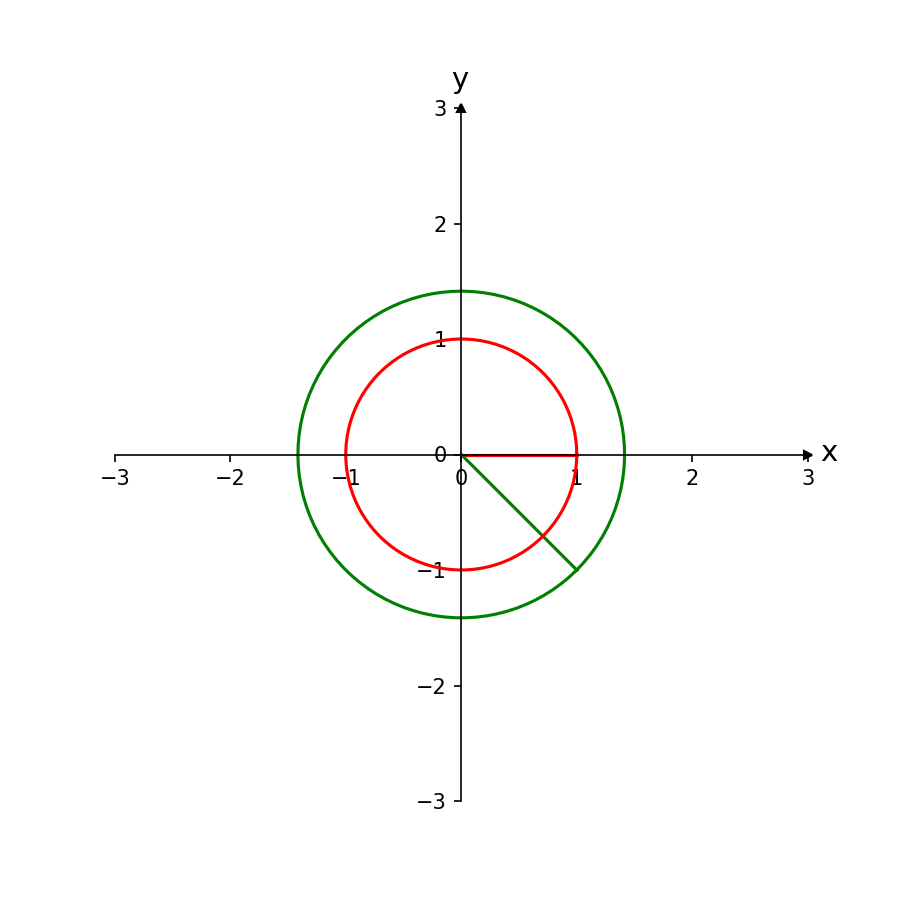

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, step=0.01), Output())…

In [34]:

def g(A, theta):
    a, c = np.cos(theta), np.sin(theta)
    x = np.linspace(0, a, 100)
    y = np.linspace(0, c, 100)
    b, d = A @ np.array([a,c])
    z = np.linspace(0, b, 100)
    w = np.linspace(0, d, 100)
    return x, y, z, w

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -2, 2, -2, 2
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

x, y, z, w = g(A, 0)
line1, = ax.plot(x,y, color='red')
line2, = ax.plot(z,w, color='green')

angles = np.linspace(0, 2*np.pi, 100)
crc = np.array([np.cos(angles), np.sin(angles)])
elps = A @ crc
ax.plot(crc[0,:], crc[1,:], color='red')
ax.plot(elps[0,:], elps[1,:], color='green')

def update(theta = 0):
    x, y, z, w = g(A,theta)
    print("x = "+str(x[-1])+","+str(y[-1]))
    print("y = "+str(z[-1])+","+str(w[-1]))
    line1.set_data(x, y)
    line2.set_data(z, w)
    fig.canvas.draw_idle()
    
interact(update, theta = (0, 2*np.pi, 0.01));

### Example: How to find eigenvalues and eigenvectors

$$
\begin{aligned}
A &= \left[\begin{matrix}0.8 & 0.3\\0.2 & 0.7\end{matrix}\right]\\
A\mathbf x &= \lambda \mathbf x\\
&= \lambda \mathbf I \mathbf x\\
(A-\lambda \mathbf I)\mathbf x &= \mathbf 0 
\end{aligned}
$$

The important matrix now is

$$
A-\lambda \mathbf I = \begin{bmatrix}
0.8-\lambda & 0.3\\
0.2 & 0.7-\lambda
\end{bmatrix}
$$

We are looking for a value of $\lambda$ such that
$$
(A-\lambda \mathbf I)\mathbf x = \mathbf 0 
$$

with $\mathbf x \neq \mathbf 0$ (otherwise the equation would be trivial).

It follows that $(A-\lambda \mathbf I)$ is not invertible. Hence:

$$
|(A-\lambda \mathbf I)| = 0
$$

Using the formula for the determinant of a $2\times 2$ matrix:

$$
(0.8-\lambda)(0.7-\lambda) - 0.2\times 0.3 = 0
$$


Simplifying:

$$
\begin{aligned}
(0.8-\lambda)(0.7-\lambda) - 0.2\times 0.3 &= 0\\
\lambda ^2 - 1.5\lambda + 0.56 - 0.06 &= 0\\
\lambda^2 - 1.5\lambda + 0.5 &= 0
\end{aligned}
$$

There is a formula for finding the solution of quadratic equations (https://en.wikipedia.org/wiki/Quadratic_equation):

$$
\begin{aligned}
\lambda_{1/2} = \frac{3}{4} \pm \sqrt{(\frac{3}{4})^2-\frac{1}{2}}\\
&= \frac{3}{4} \pm \sqrt{\frac{9-8}{16}}\\
&= \frac{3}{4} \pm \sqrt{\frac{1}{16}}\\
&= \frac{3}{4} \pm \frac{1}{4}\\
\lambda_1 &= 1\\
\lambda_2 &= 0.5
\end{aligned}
$$

$\lambda_1$ and $\lambda_2$ are the eigenvalues of $A$. Now let's find the corresponding eigenvectors.

This amount to finding the nullspace of $A-\lambda\mathbf I$:

- $\lambda_1$

$$
\begin{aligned}
(A - \lambda_1\mathbf I)\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
-0.2 & 0.3\\
0.2 & -0.3
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
-0.2 & 0.3\\
0 & 0
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
1 & -1.5\\
0 & 0
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\mathbf x_1 &= \begin{bmatrix}1.5\\1\end{bmatrix}
\end{aligned}
$$




- $\lambda_2$

$$
\begin{aligned}
(A - \lambda_2\mathbf I)\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
0.3 & 0.3\\
0.2 & 0.2
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\begin{bmatrix}
0.3 & 0.3\\
0 & 0
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\begin{bmatrix}
1 & 1\\
0 & 0
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}\\
\end{aligned}
$$

$\mathbf x_1$ is the eigenvector *corresponding to* $\lambda_1$.

$\mathbf x_2$ is the eigenvector *corresponding to* $\lambda_2$.

Any non-zero multiples of $\mathbf x_1, \mathbf x_2$ are also eigenvectors. It is common practice to use normalized eigenvectors, i.e.$\ $eigenvectors with length 1.

$$
\begin{aligned}
\mathbf v_1 &= \frac{\mathbf x_1}{||\mathbf x_1||}\\
&= \frac{1}{\sqrt{13}}\begin{bmatrix}3\\2\end{bmatrix}\\
\mathbf v_2 &= \frac{\mathbf x_1}{||\mathbf x_1||}\\
&= \frac{1}{\sqrt{2}}\begin{bmatrix}-1\\1\end{bmatrix}\\
\end{aligned}
$$

In [21]:
A = Matrix([
    [Rational(4,5), Rational(3,10)],
    [Rational(1,5), Rational(7,10)]
])
A

Matrix([
[4/5, 3/10],
[1/5, 7/10]])

In [22]:
e1, e2 = A.eigenvects()

In [23]:
lambda1, _, v1 = e1

In [24]:
lambda1

1/2

In [25]:
v1[0].normalized()

Matrix([
[-sqrt(2)/2],
[ sqrt(2)/2]])

In [26]:
lambda2, _, v2 = e2

In [27]:
lambda2

1

In [28]:
v2[0].normalized()

Matrix([
[3*sqrt(13)/13],
[2*sqrt(13)/13]])

In [29]:
A = np.array([
    [0.8, 0.3],
    [0.2, 0.7]
])
A

array([[0.8, 0.3],
       [0.2, 0.7]])

In [30]:
np.linalg.eig(A)

EigResult(eigenvalues=array([1. , 0.5]), eigenvectors=array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]]))



### Procedure to find eigenvalues and eigenvectors:

1. Construct $A-\lambda \mathbf I$ with $\lambda$ as unknown.
2. Set $|A-\lambda \mathbf I| = 0$ and solve for $\lambda$. All solutions are eigenvalues.
3. For each solution for $\lambda$, find the nullspace of $|A-\lambda \mathbf I| = 0$. Each vector in the nullspace is an eigenvector corresponding to this solution.

##### Example 2: Projection matrix

$$
A = \begin{bmatrix}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
\frac{1}{2}-\lambda & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}-\lambda
\end{vmatrix} &= 0\\
(\frac{1}{2}-\lambda)^2 - \frac{1}{4} &= 0\\
\lambda^2 -\lambda &= 0\\
\lambda(\lambda-1) &= 0\\
\lambda_1 &= 1\\
\lambda_2 &= 0
\end{aligned}
$$

- find eigenvectors

    - $\lambda_1$: 
    $$
    \begin{aligned}
    \begin{bmatrix}
    -\frac{1}{2} & \frac{1}{2}\\
    \frac{1}{2} & -\frac{1}{2}
    \end{bmatrix}\mathbf x_1 &= \mathbf 0\\
    \mathbf x_1 &= \begin{bmatrix}1\\1\end{bmatrix}
    \end{aligned}
    $$
    
    - $\lambda_2$:
    $$
    \begin{aligned}
    \begin{bmatrix}
    \frac{1}{2} & \frac{1}{2}\\
    \frac{1}{2} & \frac{1}{2}
    \end{bmatrix}\mathbf x_2 &= \mathbf 0\\
    \mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}
    \end{aligned}
    $$

##### Example 3: Reflection matrix

$$
A = \begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
-\lambda & 1\\
1 & -\lambda
\end{vmatrix} &= 0\\
\lambda^2-1 &= 0\\
\lambda^2 &= 1\\
\lambda_1 &= 1\\
\lambda_2 &= -1
\end{aligned}
$$

- find eigenvectors

    - $\lambda_1$: 
    $$
    \begin{aligned}
    \begin{bmatrix}
    -1 & 1\\
    1 & -1
    \end{bmatrix}\mathbf x_1 &= \mathbf 0\\
    \mathbf x_1 &= \begin{bmatrix}1\\1\end{bmatrix}
    \end{aligned}
    $$
    
    - $\lambda_2$:
    $$
    \begin{aligned}
    \begin{bmatrix}
    1 & 1\\
    1 & 1
    \end{bmatrix}\mathbf x_2 &= \mathbf 0\\
    \mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}
    \end{aligned}
    $$